## 市场容量分析

### 合并汇总Excel数据

In [1]:
import pandas as pd
# 文件路径为python文件位置下的相对路径
dwx=pd.read_excel("电商案例数据及数据说明/驱虫剂市场/电蚊香套装市场近三年交易额.xlsx")
fmfz=pd.read_excel("电商案例数据及数据说明/驱虫剂市场/防霉防蛀片市场近三年交易额.xlsx")
msmc=pd.read_excel("电商案例数据及数据说明/驱虫剂市场/灭鼠杀虫剂市场近三年交易额.xlsx")
mz=pd.read_excel("电商案例数据及数据说明/驱虫剂市场/盘香灭蟑香蚊香盘市场近三年交易额.xlsx")
wxq=pd.read_excel("电商案例数据及数据说明/驱虫剂市场/蚊香加热器市场近三年交易额.xlsx")
wxp=pd.read_excel("电商案例数据及数据说明/驱虫剂市场/蚊香片市场近三年交易额.xlsx")
wxy=pd.read_excel("电商案例数据及数据说明/驱虫剂市场/蚊香液市场近三年交易额.xlsx")
# 使用head()方法查看前5行数据
dwx.head()

时间       交易金额
0 2018-10-01  106531.29
1 2018-09-01  105666.63
2 2018-08-01  201467.03
3 2018-07-01  438635.29
4 2018-06-01  953749.78

In [2]:
# 使用info()方法查看数据的字段及类型
dwx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   时间      36 non-null     datetime64[ns]
 1   交易金额    36 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 708.0 bytes


In [3]:
# 用sum方法汇总单张表格数据
dwx['交易金额'].sum()

21788051.799999997

In [4]:
# 将7张表格的数据汇总并形成一张表
m_sum=pd.DataFrame({'销售额': [dwx['交易金额'].sum(), fmfz['交易金额'].sum(), msmc['交易金额'].sum(), mz['交易金额'].sum(), wxq['交易金额'].sum(), wxp['交易金额'].sum(), wxy['交易金额'].sum()]}
              ,index=['电蚊香','防霉防蛀','灭鼠灭虫','灭蟑','蚊香加热器','蚊香片','蚊香液'])
m_sum

销售额
电蚊香    2.178805e+07
防霉防蛀   1.804635e+08
灭鼠灭虫   2.527161e+09
灭蟑     2.515832e+08
蚊香加热器  3.313501e+07
蚊香片    1.281525e+08
蚊香液    8.523022e+08

### 计算销售额和占比

In [5]:
# 对上述数据进行行汇总，得到驱虫市场总销售额
m_sum.loc['Row_sum'] = m_sum['销售额'].sum()
m_sum

销售额
电蚊香      2.178805e+07
防霉防蛀     1.804635e+08
灭鼠灭虫     2.527161e+09
灭蟑       2.515832e+08
蚊香加热器    3.313501e+07
蚊香片      1.281525e+08
蚊香液      8.523022e+08
Row_sum  3.994585e+09

In [6]:
# 计算份额占比
m_sum['份额占比']=m_sum['销售额']/m_sum.loc['Row_sum','销售额']
m_sum

销售额      份额占比
电蚊香      2.178805e+07  0.005454
防霉防蛀     1.804635e+08  0.045177
灭鼠灭虫     2.527161e+09  0.632647
灭蟑       2.515832e+08  0.062981
蚊香加热器    3.313501e+07  0.008295
蚊香片      1.281525e+08  0.032082
蚊香液      8.523022e+08  0.213364
Row_sum  3.994585e+09  1.000000

In [7]:
# 将份额占比调整为百分比，保留1位小数
m_sum['份额占比']=(m_sum['销售额']/m_sum.loc['Row_sum','销售额']*100).round(1)
m_sum

销售额   份额占比
电蚊香      2.178805e+07    0.5
防霉防蛀     1.804635e+08    4.5
灭鼠灭虫     2.527161e+09   63.3
灭蟑       2.515832e+08    6.3
蚊香加热器    3.313501e+07    0.8
蚊香片      1.281525e+08    3.2
蚊香液      8.523022e+08   21.3
Row_sum  3.994585e+09  100.0

In [8]:
# 将最后一行Row_sum删除
m_sum.drop(labels=['Row_sum'],axis=0,inplace=True)
m_sum

销售额  份额占比
电蚊香    2.178805e+07   0.5
防霉防蛀   1.804635e+08   4.5
灭鼠灭虫   2.527161e+09  63.3
灭蟑     2.515832e+08   6.3
蚊香加热器  3.313501e+07   0.8
蚊香片    1.281525e+08   3.2
蚊香液    8.523022e+08  21.3

### 绘制柱状图和饼图

Text(0, 0.5, '市场绝对份额')

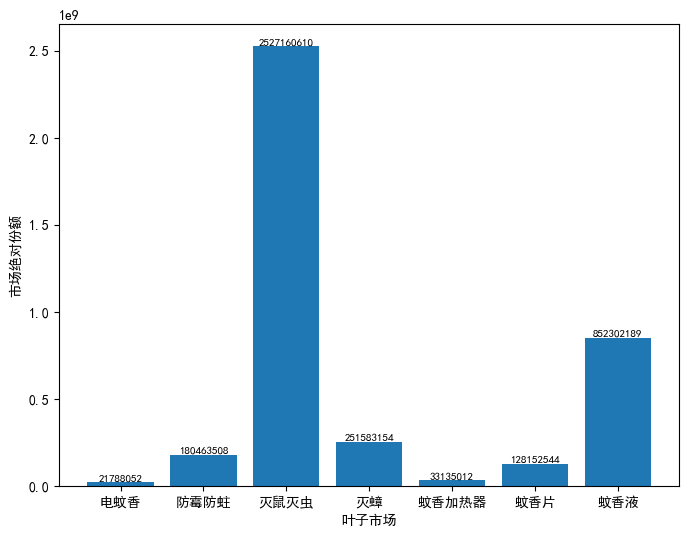

In [9]:
# 首先导入matplotlib绘图包
import matplotlib.pyplot as plt
# 设置参数，以确保图像正确显示
plt.rcParams['font.sans-serif']='simhei' #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
# 将叶子行业的名称设置为x轴，叶子行业的绝对份额设置为y轴
x=m_sum.index
y=m_sum["销售额"]
# 设置画布大小
pl=plt.figure(figsize=(8,6))# 表示图片的大小为宽8inch、高6inch（单位为inch）
# 绘制叶子市场绝对份额柱形图
plt.bar(x,y)
# 设置数字标签
for a,b in zip(x,y):
   plt.text(a,b+0.05,'%.0f'% b,ha='center',va='bottom',fontsize=8)
# 设置标题以及x轴标题，y轴标题
plt.xlabel('叶子市场')
plt.ylabel('市场绝对份额')

Text(0.5, 1.0, '叶子市场相对市场份额')

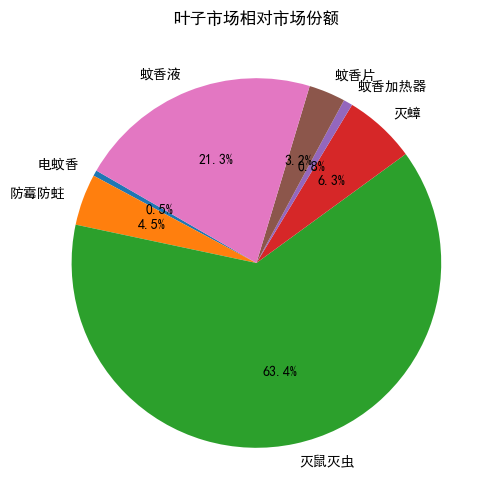

In [10]:
# 用市场相对份额绘制饼图
# 将叶子行业名称设置为饼图的标签，相对市场份额设置为饼图的大小
labels = m_sum.index
sizes = m_sum["份额占比"]
# 设置画布大小宽8inch，高6inch
pl=plt.figure(figsize=(8,6))
# 绘制饼图，autopct='%.1f%%'：# 设置百分比的格式，此处保留1位小数，f后面的两个%表示实际显示数字的百分号，startangle=180# 设置饼图的初始角度。
plt.pie(sizes,labels=labels,autopct='%.1f%%',startangle=150)
# 设置标题
plt.title("叶子市场相对市场份额")

## 市场趋势分析

### 根据日期merge到一个表中

In [11]:
# 根据时间合并市场数据
d=pd.merge(dwx,fmfz,on='时间',suffixes=('', '_fmfz'))
d=pd.merge(d,msmc,on='时间',suffixes=('','_msmc'))
d=pd.merge(d,mz,on='时间',suffixes=('','mz'))
d=pd.merge(d,wxq,on='时间',suffixes=('','wxq'))
d=pd.merge(d,wxp,on='时间',suffixes=('','wxp'))
d=pd.merge(d,wxy,on='时间',suffixes=('','wxy'))
d.head()

时间       交易金额   交易金额_fmfz     交易金额_msmc       交易金额mz     交易金额wxq  \
0 2018-10-01  106531.29  8541153.59  1.136548e+08   4171283.35   315639.48   
1 2018-09-01  105666.63  8825870.43  1.440261e+08   6784500.17   457366.41   
2 2018-08-01  201467.03  6320153.44  1.540426e+08  10709683.41   746513.13   
3 2018-07-01  438635.29  6302595.06  1.480032e+08  16589184.89  1871757.00   
4 2018-06-01  953749.78  7047206.98  1.359438e+08  23526385.73  3641025.92   

       交易金额wxp      交易金额wxy  
0   1032414.29   7814546.15  
1   1566651.88  10654973.47  
2   2617149.00  17835577.80  
3   6209040.06  38877917.83  
4  12484919.63  76499091.86

In [12]:
d.columns=['时间','电蚊香','防霉防蛀','灭鼠灭虫','灭蟑','蚊香加热器','蚊香片','蚊香液']
d

时间         电蚊香        防霉防蛀          灭鼠灭虫           灭蟑       蚊香加热器  \
0  2018-10-01   106531.29  8541153.59  1.136548e+08   4171283.35   315639.48   
1  2018-09-01   105666.63  8825870.43  1.440261e+08   6784500.17   457366.41   
2  2018-08-01   201467.03  6320153.44  1.540426e+08  10709683.41   746513.13   
3  2018-07-01   438635.29  6302595.06  1.480032e+08  16589184.89  1871757.00   
4  2018-06-01   953749.78  7047206.98  1.359438e+08  23526385.73  3641025.92   
5  2018-05-01  1238967.37  7942340.44  1.241642e+08  28118581.25  5032466.78   
6  2018-04-01   841051.93  7031364.60  7.509661e+07  16420341.87  3130513.43   
7  2018-03-01   475177.48  6051561.02  5.918182e+07   7900094.91  1198332.81   
8  2018-02-01    33232.95  1393948.47  2.292138e+07    545917.66    75714.46   
9  2018-01-01    54305.20  2607776.07  3.653873e+07    592663.20    86670.45   
10 2017-12-01    71600.17  3259747.23  4.292283e+07    796930.46    69145.59   
11 2017-11-01    94993.76  5447184.43  5.838217e+07   1581530.20   168141.79   
12 2017-10-01   145925.31  6152868.25  8.226882e+07   2824785.80   166522.62   
13 2017-09-01   242194.37  5792065.80  1.010081e+08   5581352.42   353042.45   
14 2017-08-01   332922.02  5081714.64  1.049504e+08   7229409.84   544076.63   
15 2017-07-01   913425.95  6691694.17  1.116729e+08  13718046.88  1357778.93   
16 2017-06-01  2045163.59  7155138.87  1.051463e+08  19635925.59  2639777.66   
17 2017-05-01  3606141.82  8145781.12  9.185035e+07  20275515.85  3185961.75   
18 2017-04-01  1285599.49  6682161.49  5.363586e+07   9197868.29  1554864.42   
19 2017-03-01   390486.57  3904656.82  4.078967e+07   3397837.60   317206.48   
20 2017-02-01   209643.87  2584035.90  3.467502e+07   1519446.34   148158.07   
21 2017-01-01    39434.76  1781773.46  2.047156e+07    596744.04    48164.63   
22 2016-12-01    84350.57  3504367.98  3.546668e+07   1234900.05    52118.96   
23 2016-11-01   106291.23  4975519.21  4.780625e+07   1473418.20    82835.82   
24 2016-10-01   179015.23  4600717.78  6.339722e+07   2543813.78   130484.07   
25 2016-09-01   210456.69  4642681.07  6.864724e+07   3092898.02   168724.83   
26 2016-08-01   316467.14  4151326.68  7.610885e+07   4389862.79   272553.95   
27 2016-07-01   932728.10  5412185.06  7.832954e+07   7384968.66   761159.35   
28 2016-06-01  2184985.33  5694825.13  7.693264e+07  10859461.67  1728788.53   
29 2016-05-01  2059879.80  5469360.60  5.812696e+07   9912801.93  1618361.54   
30 2016-04-01  1034992.53  5253619.06  3.762602e+07   4687913.18   758206.81   
31 2016-03-01   352013.31  3481194.46  2.952610e+07   1204574.20   246106.75   
32 2016-02-01    96979.48  1274810.96  1.500135e+07    449199.41    36193.85   
33 2016-01-01   108412.71  1562393.95  2.107822e+07    619042.01    49670.25   
34 2015-12-01   110068.83  2333602.08  2.472756e+07    818479.56    34076.91   
35 2015-11-01   185094.22  3364112.14  3.303873e+07   1197791.27    86889.91   

            蚊香片           蚊香液  
0    1032414.29  7.814546e+06  
1    1566651.88  1.065497e+07  
2    2617149.00  1.783558e+07  
3    6209040.06  3.887792e+07  
4   12484919.63  7.649909e+07  
5   15309721.94  1.050396e+08  
6    7954875.07  6.254165e+07  
7    2950648.32  2.632447e+07  
8     218915.63  2.235774e+06  
9     298146.11  1.759451e+06  
10    314120.38  2.213103e+06  
11    617094.94  4.257594e+06  
12    766588.77  4.290843e+06  
13   1574779.65  7.833349e+06  
14   2323304.14  1.376039e+07  
15   6627299.71  4.257757e+07  
16  12422420.21  8.283230e+07  
17  15961946.71  1.014605e+08  
18   6214963.68  4.880687e+07  
19   1319399.22  1.488979e+07  
20    687697.46  5.929509e+06  
21    238973.09  1.213749e+06  
22    293737.20  1.558634e+06  
23    512990.23  2.758827e+06  
24    690912.02  3.641803e+06  
25    930513.91  4.632818e+06  
26   1581021.50  8.956868e+06  
27   4088320.77  2.260036e+07  
28   8004562.69  4.640197e+07  
29   7474421.97  4.777690e+07  
30   3435257.35  2.432917e+07  
31    746709.07  6.656382e

### 补齐18年11,12月份数据

#### 线性回归算法

In [13]:
#sklearn中关于糖尿病的数据集
from sklearn import datasets
df = datasets.load_diabetes(as_frame=True).frame
df.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0

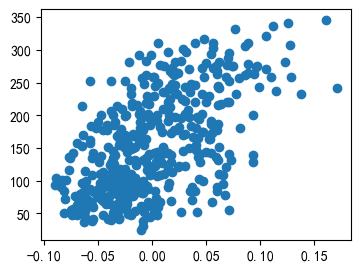

In [14]:
#画出BMI和血糖散点图
import matplotlib.pyplot as plt
plt.figure(figsize=(4,3))
plt.scatter(df['bmi'], df['target'])

In [15]:
#线性回归的X,只有一个变量,是一列数据
X = df[['bmi']]
X.head()

bmi
0  0.061696
1 -0.051474
2  0.044451
3 -0.011595
4 -0.036385

In [16]:
#线性回归的Y
y = df['target']
y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

In [17]:
#生成线性回归模型，打印截距和系数
from sklearn import linear_model
line = linear_model.LinearRegression()
line.fit(X, y)
line.intercept_,line.coef_

(152.13348416289617, array([949.43526038]))

In [18]:
#打印预测值
y_predict=line.predict(X)
y_predict

array([210.71003806, 103.26219543, 194.33703347, 141.12476855,
       117.58857445, 113.4953233 , 107.35544658, 150.33458363,
       210.71003806, 189.22046954,  72.56281182, 168.7542138 ,
       124.75176395, 150.33458363, 127.82170232, 134.98489182,
       192.2904079 , 163.63764986, 142.14808133, 134.98489182,
        98.14563149, 130.89164068, 148.28795806, 209.68672528,
       186.15053118, 140.10145576,  78.70268854, 208.66341249,
       131.91495346, 146.24133248, 194.33703347,  89.9591292 ,
       271.0854925 , 104.28550821,  92.00575477, 122.70513838,
       173.87077773, 162.61433707, 219.91985315, 165.68427544,
       144.19470691,  87.91250362, 142.14808133, 129.86832789,
       216.84991479, 118.61188723, 141.12476855,  82.79593969,
       112.47201051, 165.68427544, 145.2180197 , 167.73090101,
       143.17139412, 137.0315174 , 175.91740331, 105.308821  ,
       191.26709511,  92.00575477,  90.98244198, 127.82170232,
       148.28795806, 156.47446035, 145.2180197 , 116.56

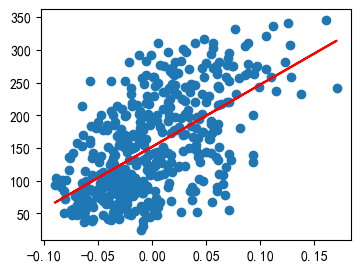

In [19]:
#画出拟合直线
plt.figure(figsize=(4,3))
plt.plot(X,y_predict,color='red')
plt.scatter(df['bmi'], df['target'])

#### 使用线性回归计算数据

In [20]:
#索引2017年12月数据
t17 = d[d.时间=='2017-12-1']
t16 = d[d.时间=='2016-12-1']
t15 = d[d.时间=='2015-12-1']
display(t17,t16,t15)

时间       电蚊香        防霉防蛀         灭鼠灭虫         灭蟑     蚊香加热器  \
10 2017-12-01  71600.17  3259747.23  42922831.01  796930.46  69145.59   

          蚊香片         蚊香液  
10  314120.38  2213102.83

时间       电蚊香        防霉防蛀         灭鼠灭虫          灭蟑     蚊香加热器  \
22 2016-12-01  84350.57  3504367.98  35466680.56  1234900.05  52118.96   

         蚊香片         蚊香液  
22  293737.2  1558633.63

时间        电蚊香        防霉防蛀         灭鼠灭虫         灭蟑     蚊香加热器  \
34 2015-12-01  110068.83  2333602.08  24727556.28  818479.56  34076.91   

          蚊香片        蚊香液  
34  134890.48  583284.49

In [21]:
t4=pd.concat([t17,t16,t15])
t4['年份']=t4['时间'].dt.year
t4

时间        电蚊香        防霉防蛀         灭鼠灭虫          灭蟑     蚊香加热器  \
10 2017-12-01   71600.17  3259747.23  42922831.01   796930.46  69145.59   
22 2016-12-01   84350.57  3504367.98  35466680.56  1234900.05  52118.96   
34 2015-12-01  110068.83  2333602.08  24727556.28   818479.56  34076.91   

          蚊香片         蚊香液    年份  
10  314120.38  2213102.83  2017  
22  293737.20  1558633.63  2016  
34  134890.48   583284.49  2015

In [22]:
# 使用回归算法预测，先加载numpy和sklearn库。
import numpy as np
from sklearn import linear_model
# 画出年份和销售额走势
x_train=t4[['年份']]
y_train=t4['电蚊香']
display(x_train,y_train)

年份
10  2017
22  2016
34  2015

10     71600.17
22     84350.57
34    110068.83
Name: 电蚊香, dtype: float64

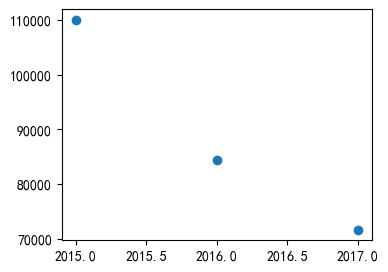

In [23]:
plt.figure(figsize=(4,3))
plt.scatter(x_train,y_train)

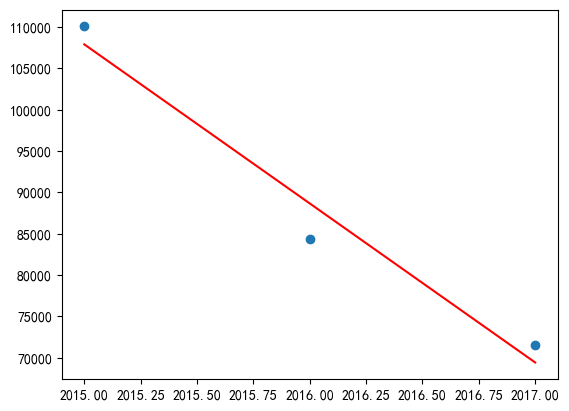

In [24]:
# 画出拟合走势
linear_reg=linear_model.LinearRegression()
linear_reg.fit(x_train,y_train)
y_pre=linear_reg.predict(x_train)
plt.scatter(x_train,y_train)
plt.plot(x_train,y_pre,color='red')

In [25]:
y_pre=linear_reg.predict(pd.DataFrame({'年份':[2018]}))
y_pre[0].round(1)

50204.5

In [26]:
y_12=[]
# 写FOR循环，得到2018年所有类目12月份的预测值
for col in t4.loc[:,'电蚊香':'蚊香液'].columns:
    y_train = t4[col]
    linear_reg.fit(x_train,y_train)
    y_pre=linear_reg.predict(pd.DataFrame({'年份':[2018]}))
    y_12.append(y_pre[0].round(1))
y_12                          

[50204.5, 3958717.6, 52567630.7, 928554.3, 86849.2, 426812.6, 3081492.0]

In [27]:
#索引2017年11月数据
t17 = d[d.时间=='2017-11-1']
t16 = d[d.时间=='2016-11-1']
t15 = d[d.时间=='2015-11-1']
t4=pd.concat([t17,t16,t15])
t4['年份']=t4['时间'].dt.year
x_train=t4[['年份']]
y_11=[]
# 写FOR循环，得到2018年所有类目11月份的预测值
for col in t4.loc[:,'电蚊香':'蚊香液'].columns:
    y_train = t4[col]
    linear_reg.fit(x_train,y_train)
    y_pre=linear_reg.predict(pd.DataFrame({'年份':[2018]}))
    y_11.append(y_pre[0].round(1))
y_11                          

[38692.6, 6678677.5, 71752496.0, 1801318.8, 193874.4, 776627.0, 5543203.8]

#### 补齐数据

In [28]:
import datetime# 将字符串转为datetime。
#在第一列添加月份
a1=datetime.datetime.strptime('2018-11-1','%Y-%m-%d')
y_11.insert(0,a1)
print(y_11)

[datetime.datetime(2018, 11, 1, 0, 0), 38692.6, 6678677.5, 71752496.0, 1801318.8, 193874.4, 776627.0, 5543203.8]


In [29]:
#在第一列添加月份
a2=datetime.datetime.strptime('2018-12-1','%Y-%m-%d')
y_12.insert(0,a2)
print(y_12)

[datetime.datetime(2018, 12, 1, 0, 0), 50204.5, 3958717.6, 52567630.7, 928554.3, 86849.2, 426812.6, 3081492.0]


In [30]:
#添加到原始数据
d.loc[len(d)] = y_11
d.loc[len(d)] = y_12
d.tail()

时间        电蚊香        防霉防蛀          灭鼠灭虫           灭蟑       蚊香加热器  \
0 2018-10-01  106531.29  8541153.59  1.136548e+08   4171283.35   315639.48   
1 2018-09-01  105666.63  8825870.43  1.440261e+08   6784500.17   457366.41   
2 2018-08-01  201467.03  6320153.44  1.540426e+08  10709683.41   746513.13   
3 2018-07-01  438635.29  6302595.06  1.480032e+08  16589184.89  1871757.00   
4 2018-06-01  953749.78  7047206.98  1.359438e+08  23526385.73  3641025.92   

           蚊香片          蚊香液  
0   1032414.29   7814546.15  
1   1566651.88  10654973.47  
2   2617149.00  17835577.80  
3   6209040.06  38877917.83  
4  12484919.63  76499091.86

In [31]:
#按时间降序并重置索引
d.sort_values(by='时间',ascending=False,inplace=True,ignore_index=True)
d.head()

时间        电蚊香        防霉防蛀          灭鼠灭虫           灭蟑      蚊香加热器  \
0 2018-12-01   50204.50  3958717.60  5.256763e+07    928554.30   86849.20   
1 2018-11-01   38692.60  6678677.50  7.175250e+07   1801318.80  193874.40   
2 2018-10-01  106531.29  8541153.59  1.136548e+08   4171283.35  315639.48   
3 2018-09-01  105666.63  8825870.43  1.440261e+08   6784500.17  457366.41   
4 2018-08-01  201467.03  6320153.44  1.540426e+08  10709683.41  746513.13   

          蚊香片          蚊香液  
0   426812.60   3081492.00  
1   776627.00   5543203.80  
2  1032414.29   7814546.15  
3  1566651.88  10654973.47  
4  2617149.00  17835577.80

### 汇总数据

In [32]:
d['col_sum']=d.loc[:,'电蚊香':'蚊香液'].sum(axis=1)
d.head()

时间        电蚊香        防霉防蛀          灭鼠灭虫           灭蟑      蚊香加热器  \
0 2018-12-01   50204.50  3958717.60  5.256763e+07    928554.30   86849.20   
1 2018-11-01   38692.60  6678677.50  7.175250e+07   1801318.80  193874.40   
2 2018-10-01  106531.29  8541153.59  1.136548e+08   4171283.35  315639.48   
3 2018-09-01  105666.63  8825870.43  1.440261e+08   6784500.17  457366.41   
4 2018-08-01  201467.03  6320153.44  1.540426e+08  10709683.41  746513.13   

          蚊香片          蚊香液       col_sum  
0   426812.60   3081492.00  6.110026e+07  
1   776627.00   5543203.80  8.678489e+07  
2  1032414.29   7814546.15  1.356363e+08  
3  1566651.88  10654973.47  1.724211e+08  
4  2617149.00  17835577.80  1.924731e+08

In [33]:
d['year']=d['时间'].dt.year
d.head()

时间        电蚊香        防霉防蛀          灭鼠灭虫           灭蟑      蚊香加热器  \
0 2018-12-01   50204.50  3958717.60  5.256763e+07    928554.30   86849.20   
1 2018-11-01   38692.60  6678677.50  7.175250e+07   1801318.80  193874.40   
2 2018-10-01  106531.29  8541153.59  1.136548e+08   4171283.35  315639.48   
3 2018-09-01  105666.63  8825870.43  1.440261e+08   6784500.17  457366.41   
4 2018-08-01  201467.03  6320153.44  1.540426e+08  10709683.41  746513.13   

          蚊香片          蚊香液       col_sum  year  
0   426812.60   3081492.00  6.110026e+07  2018  
1   776627.00   5543203.80  8.678489e+07  2018  
2  1032414.29   7814546.15  1.356363e+08  2018  
3  1566651.88  10654973.47  1.724211e+08  2018  
4  2617149.00  17835577.80  1.924731e+08  2018

In [34]:
data_sum=d.loc[:,'电蚊香':'year'].groupby('year').sum()
data_sum

电蚊香         防霉防蛀          灭鼠灭虫            灭蟑        蚊香加热器  \
year                                                                     
2015   295163.05   5697714.22  5.776628e+07  2.016271e+06    120966.82   
2016  7666572.12  50023001.94  6.080471e+08  4.785285e+07   5905204.71   
2017  9377531.68  62678822.18  8.477740e+08  8.635539e+07  10552841.02   
2018  4537682.05  72701365.20  1.137893e+09  1.180885e+08  16836723.47   

              蚊香片           蚊香液       col_sum  
year                                           
2015    460634.91  2.163080e+06  6.852011e+07  
2016  27980839.47  1.704905e+08  9.179661e+08  
2017  49068587.96  3.300656e+08  1.395873e+09  
2018  51845921.53  3.582077e+08  1.760111e+09

### 绘制趋势图

#### 总量趋势图

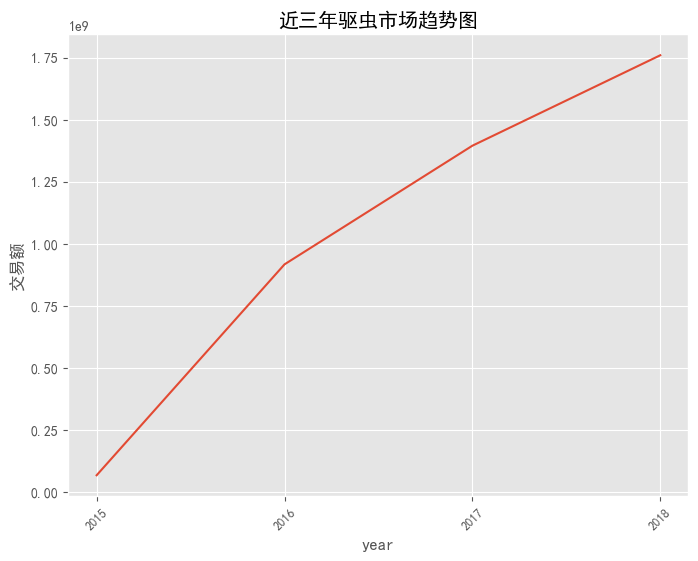

In [35]:
x=data_sum.index
y=data_sum['col_sum']
# 选择ggplot的绘图方式。
with plt.style.context('ggplot'):
    # 设置画布大小宽8inch，高6inch。
    pl=plt.figure(figsize=(8,6))
    # 绘制线图。
    plt.plot(x, y)
    # 设置图表标题，x轴标题，y轴标题，设置刻度线格式。
    plt.title('近三年驱虫市场趋势图')
    plt.xlabel('year')
    plt.ylabel('交易额')
    plt.xticks(x, fontsize=9, rotation=45)  # rotation=45表示横轴逆时针选择45度
 

#### 各个叶子市场的趋势图

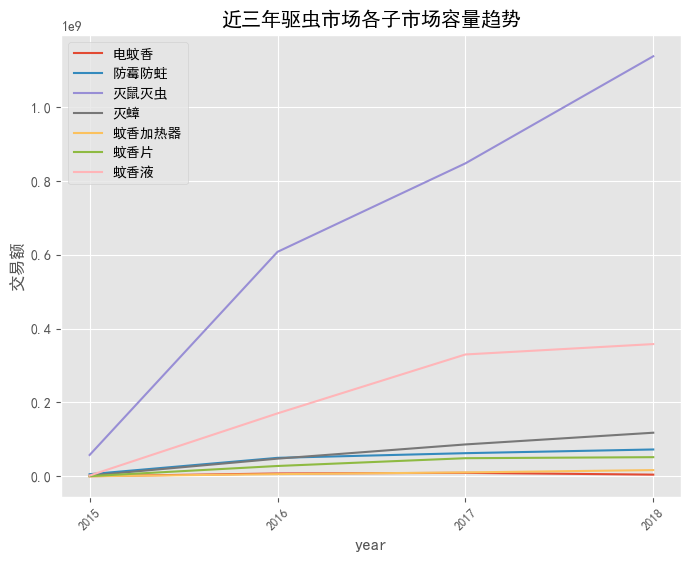

In [36]:
with plt.style.context('ggplot'):
    # 设置画布大小宽8inch，高6inch。
    pl=plt.figure(figsize=(8,6))
    # 绘制各叶子行业市场趋势线图。
#     plt.plot(x,data_sum.iloc[:,0])
#     plt.plot(x,data_sum.iloc[:,1])
#     plt.plot(x,data_sum.iloc[:,2])
#     plt.plot(x,data_sum.iloc[:,3])
#     plt.plot(x,data_sum.iloc[:,4])
#     plt.plot(x,data_sum.iloc[:,5])
#     plt.plot(x,data_sum.iloc[:,6])
    for i in range(0,7):
        plt.plot(x,data_sum.iloc[:,i])
    # 设置图的标题，x轴标题，y轴标题，设置刻度线格式。
    plt.title('近三年驱虫市场各子市场容量趋势')
    plt.xlabel('year')
    plt.ylabel('交易额')
    plt.xticks(x,fontsize=9,rotation=45)
    # 设置图例，并画图，如图4-4所示。
    plt.legend(['电蚊香','防霉防蛀','灭鼠灭虫','灭蟑','蚊香加热器','蚊香片','蚊香液'])

#### 各子行业占比

In [37]:
display(data_sum)
df_percentage = data_sum.div(data_sum['col_sum'], axis=0)
df_percentage

电蚊香         防霉防蛀          灭鼠灭虫            灭蟑        蚊香加热器  \
year                                                                     
2015   295163.05   5697714.22  5.776628e+07  2.016271e+06    120966.82   
2016  7666572.12  50023001.94  6.080471e+08  4.785285e+07   5905204.71   
2017  9377531.68  62678822.18  8.477740e+08  8.635539e+07  10552841.02   
2018  4537682.05  72701365.20  1.137893e+09  1.180885e+08  16836723.47   

              蚊香片           蚊香液       col_sum  
year                                           
2015    460634.91  2.163080e+06  6.852011e+07  
2016  27980839.47  1.704905e+08  9.179661e+08  
2017  49068587.96  3.300656e+08  1.395873e+09  
2018  51845921.53  3.582077e+08  1.760111e+09

电蚊香      防霉防蛀      灭鼠灭虫        灭蟑     蚊香加热器       蚊香片       蚊香液  \
year                                                                         
2015  0.004308  0.083154  0.843056  0.029426  0.001765  0.006723  0.031569   
2016  0.008352  0.054493  0.662385  0.052129  0.006433  0.030481  0.185726   
2017  0.006718  0.044903  0.607343  0.061865  0.007560  0.035153  0.236458   
2018  0.002578  0.041305  0.646489  0.067092  0.009566  0.029456  0.203514   

      col_sum  
year           
2015      1.0  
2016      1.0  
2017      1.0  
2018      1.0

In [38]:
df_percentage=(df_percentage.iloc[:,:-1]*100).round(2)
df_percentage

电蚊香  防霉防蛀   灭鼠灭虫    灭蟑  蚊香加热器   蚊香片    蚊香液
year                                             
2015  0.43  8.32  84.31  2.94   0.18  0.67   3.16
2016  0.84  5.45  66.24  5.21   0.64  3.05  18.57
2017  0.67  4.49  60.73  6.19   0.76  3.52  23.65
2018  0.26  4.13  64.65  6.71   0.96  2.95  20.35

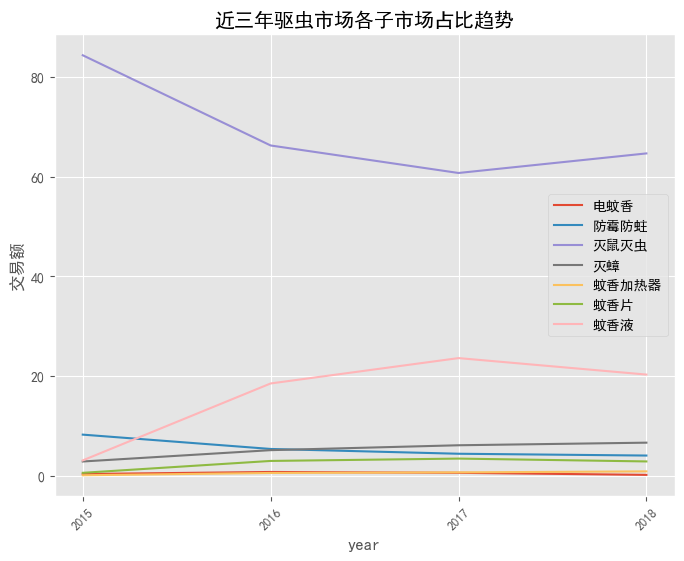

In [39]:
with plt.style.context('ggplot'):
    pl=plt.figure(figsize=(8,6))
    for i in range(0,7):
        plt.plot(x,df_percentage.iloc[:,i])
    plt.title('近三年驱虫市场各子市场占比趋势')
    plt.xlabel('year')
    plt.ylabel('交易额')
    plt.xticks(x,fontsize=9,rotation=45)
    plt.legend(['电蚊香','防霉防蛀','灭鼠灭虫','灭蟑','蚊香加热器','蚊香片','蚊香液'])

#### 计算市场增量

In [40]:
display(data_sum)
data_sum.pct_change()

电蚊香         防霉防蛀          灭鼠灭虫            灭蟑        蚊香加热器  \
year                                                                     
2015   295163.05   5697714.22  5.776628e+07  2.016271e+06    120966.82   
2016  7666572.12  50023001.94  6.080471e+08  4.785285e+07   5905204.71   
2017  9377531.68  62678822.18  8.477740e+08  8.635539e+07  10552841.02   
2018  4537682.05  72701365.20  1.137893e+09  1.180885e+08  16836723.47   

              蚊香片           蚊香液       col_sum  
year                                           
2015    460634.91  2.163080e+06  6.852011e+07  
2016  27980839.47  1.704905e+08  9.179661e+08  
2017  49068587.96  3.300656e+08  1.395873e+09  
2018  51845921.53  3.582077e+08  1.760111e+09

电蚊香      防霉防蛀      灭鼠灭虫         灭蟑      蚊香加热器        蚊香片  \
year                                                                   
2015        NaN       NaN       NaN        NaN        NaN        NaN   
2016  24.974024  7.779486  9.525986  22.733346  47.816731  59.744071   
2017   0.223171  0.253000  0.394257   0.804603   0.787041   0.753650   
2018  -0.516111  0.159903  0.342213   0.367471   0.595468   0.056601   

            蚊香液    col_sum  
year                        
2015        NaN        NaN  
2016  77.818404  12.397031  
2017   0.935976   0.520615  
2018   0.085262   0.260940

#### 绘制组合图

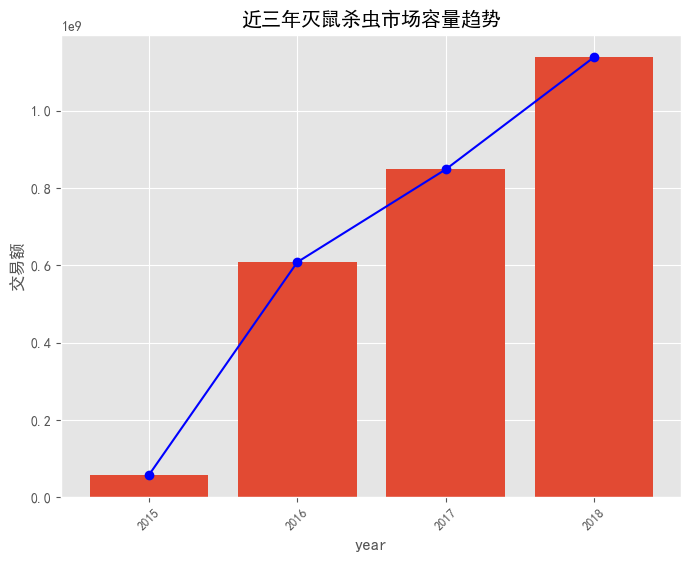

In [41]:
with plt.style.context('ggplot'):
    pl=plt.figure(figsize=(8,6))
    # 绘制柱状图。
    plt.bar(x,data_sum["灭鼠灭虫"])
    # 绘制线图，color='b'表示图形的颜色渲染成蓝色（blue），marker表示标记用o标记。
    plt.plot(x,data_sum["灭鼠灭虫"],color='b',marker='o')
    plt.title('近三年灭鼠杀虫市场容量趋势')
    plt.xlabel('year')
    plt.ylabel('交易额')
    plt.xticks(x,fontsize=9,rotation=45)

## 细分市场分析

### 类别的分布分析

#### 计算份额

In [42]:
# 文件路径为python文件位置下的相对路径
d1=pd.read_excel("电商案例数据及数据说明/灭鼠杀虫剂细分市场/螨.xlsx")
d2=pd.read_excel("电商案例数据及数据说明/灭鼠杀虫剂细分市场/灭鼠.xlsx")
d3=pd.read_excel("电商案例数据及数据说明/灭鼠杀虫剂细分市场/杀虫.xlsx")
d4=pd.read_excel("电商案例数据及数据说明/灭鼠杀虫剂细分市场/虱子.xlsx")
d5=pd.read_excel("电商案例数据及数据说明/灭鼠杀虫剂细分市场/蟑螂.xlsx")
# 将各分类的类别属性和销售额索引出。
a1=d1[['类别','预估销售额']]
a2=d2[['类别','预估销售额']]
a3=d3[['类别','预估销售额']]
a4=d4[['类别','预估销售额']]
a5=d5[['类别','预估销售额']]
# 合并数据集。
data=pd.concat([a1,a2,a3,a4,a5])
data

类别      预估销售额
0      螨  1012935.0
1      螨   320779.8
2      螨   502460.0
3      螨   502460.0
4      螨  1882739.0
...   ..        ...
1738  蟑螂      138.6
1739  蟑螂     5250.0
1740  蟑螂      291.2
1741  蟑螂      110.6
1742  蟑螂      208.6

[6556 rows x 2 columns]

In [43]:
# 按照类别进行分组求和汇总。
data2=data.groupby('类别').sum()
data2

预估销售额
类别             
杀虫   8207628.10
灭鼠  25686011.99
虱    4512886.01
螨   10886752.88
蟑螂  18037223.68

In [44]:
# 计算每一个类别占总体的份额比例，保留两位小数。
data2['份额占比']=round(data2["预估销售额"]/data2["预估销售额"].sum()*100,2)
data2

预估销售额   份额占比
类别                    
杀虫   8207628.10  12.19
灭鼠  25686011.99  38.15
虱    4512886.01   6.70
螨   10886752.88  16.17
蟑螂  18037223.68  26.79

#### 绘制份额条形图

Text(0, 0.5, '类别')

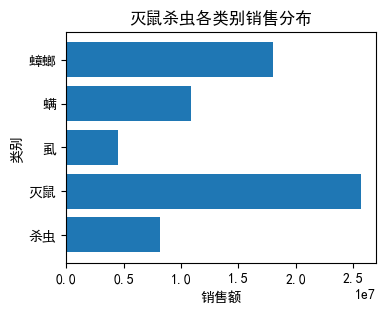

In [45]:
# 将产品分类设置为条形图的y坐标轴，销售额设置为条形图的x坐标轴
cate=list(data2.index)
value = data2["预估销售额"]
# 设置画布大小宽10inch，高6inch
pl=plt.figure(figsize=(4,3))
# 绘制条形图
plt.barh(cate, value)
# 设置图标题、x轴标题，y轴标题，并绘制图形
plt.title('灭鼠杀虫各类别销售分布')
plt.xlabel('销售额')
plt.ylabel('类别')

#### 绘制份额饼状图

Text(0.5, 1.0, '类别的相对份额占比')

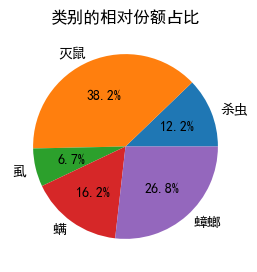

In [46]:
# 设置画布
plt.figure(figsize=(4,3))
# 将类别设置为标签、将份额占比设置为大小
labels = list(data2.index)
sizes = data2["份额占比"]
# 绘制饼图
plt.pie(sizes,labels=labels,autopct='%.1f%%')
# 设置图标题，并绘制图形
plt.title("类别的相对份额占比")

#### 识别潜力细分市场

##### 数据预处理，删除多余字段

In [47]:
# 根据业务理解删除无关字段
d2.drop(['时间','页码','排名','链接','主图链接','主图视频链接','宝贝标题','下架时间','旺旺'],axis=1,inplace=True)
d2.head()

类别          宝贝ID  销量（人数）    售价     预估销售额   运费     评价人数   收藏人数      类目  \
0  灭鼠  566054780243    9976  26.8  267356.8  0.0  11901.0  11596  灭鼠/杀虫剂   
1  灭鼠  566054780243    9976  26.8  267356.8  0.0      NaN  11596  灭鼠/杀虫剂   
2  灭鼠  572115448996    9945   9.9   98455.5  0.0  26442.0   3569  灭鼠/杀虫剂   
3  灭鼠   39868408322      99  29.9    2960.1  0.0     20.0    352  灭鼠/杀虫剂   
4  灭鼠  520282897220      99  39.9    3950.1  0.0    559.0   1250  灭鼠/杀虫剂   

      地域  ... 输出功率  机器智能功能  双猫三用  大号  小号  黑色特大号  黄色特大号  洞口尺寸  样式 洞口内径尺寸  
0  广东 韶关  ...  NaN     NaN   NaN NaN NaN    NaN    NaN   NaN NaN    NaN  
1  广东 深圳  ...  NaN     NaN   NaN NaN NaN    NaN    NaN   NaN NaN    NaN  
2    NaN  ...  NaN     NaN   NaN NaN NaN    NaN    NaN   NaN NaN    NaN  
3  河南 南阳  ...  NaN     NaN   NaN NaN NaN    NaN    NaN   NaN NaN    NaN  
4    NaN  ...  NaN     NaN   NaN NaN NaN    NaN    NaN   NaN NaN    NaN  

[5 rows x 80 columns]

In [48]:
# 遍历每一个字段，删除仅包含一种信息的字段
for  i  in d2.columns:
    if len(d2[i].value_counts())<=1:
        del d2[i]
d2.head()

宝贝ID  销量（人数）    售价     预估销售额   运费     评价人数   收藏人数     地域 店铺类型 适用对象  \
0  566054780243    9976  26.8  267356.8  0.0  11901.0  11596  广东 韶关   天猫   老鼠   
1  566054780243    9976  26.8  267356.8  0.0      NaN  11596  广东 深圳   天猫   老鼠   
2  572115448996    9945   9.9   98455.5  0.0  26442.0   3569    NaN   淘宝   老鼠   
3   39868408322      99  29.9    2960.1  0.0     20.0    352  河南 南阳   天猫   老鼠   
4  520282897220      99  39.9    3950.1  0.0    559.0   1250    NaN   淘宝   老鼠   

   ...  净含量 包装体积 物理形态   毛重   产地   省份   地市    产品名称 药品登记号 是否量贩装  
0  ...  NaN  NaN   胶水  NaN  NaN  NaN  NaN     NaN   NaN   NaN  
1  ...  NaN  NaN   胶水  NaN  NaN  NaN  NaN     NaN   NaN   NaN  
2  ...  NaN  NaN   固体  NaN  NaN  NaN  NaN     NaN   NaN   NaN  
3  ...  NaN  NaN   固体  NaN  NaN  NaN  NaN  云杀 粘鼠板   NaN   NaN  
4  ...    g  NaN   固体  NaN  NaN  NaN  NaN     NaN   NaN   NaN  

[5 rows x 22 columns]

In [49]:
# 缺失值大于90%的字段删除（使用sum求为Ture的个数）
for  i  in d2.columns:
    if d2[i].isnull().sum()>d2.shape[0]*0.9:
        del d2[i]
d2.head()

宝贝ID  销量（人数）    售价     预估销售额   运费     评价人数   收藏人数     地域 店铺类型 适用对象  \
0  566054780243    9976  26.8  267356.8  0.0  11901.0  11596  广东 韶关   天猫   老鼠   
1  566054780243    9976  26.8  267356.8  0.0      NaN  11596  广东 深圳   天猫   老鼠   
2  572115448996    9945   9.9   98455.5  0.0  26442.0   3569    NaN   淘宝   老鼠   
3   39868408322      99  29.9    2960.1  0.0     20.0    352  河南 南阳   天猫   老鼠   
4  520282897220      99  39.9    3950.1  0.0    559.0   1250    NaN   淘宝   老鼠   

    品牌     型号  净含量 物理形态  
0  优璇福  MT007  NaN   胶水  
1  优璇福  MT007  NaN   胶水  
2   创驰  21/32  NaN   固体  
3   云杀    粘鼠板  NaN   固体  
4   得硕    NaN    g   固体

In [50]:
# 观察数据集售价字段的范围在0-498元。
d2.describe()

宝贝ID         销量（人数）           售价         预估销售额           运费  \
count  1.523000e+03    1523.000000  1523.000000  1.504000e+03  1523.000000   
mean   4.657358e+11     558.900854    49.018910  1.707847e+04     0.920886   
std    2.034076e+11    5657.138493    69.762057  1.172321e+05     2.801902   
min    1.868822e+09       0.000000     0.010000  1.000000e-02     0.000000   
25%    5.286903e+11       3.000000    15.800000  7.939500e+01     0.000000   
50%    5.605955e+11      10.000000    27.700000  2.985000e+02     0.000000   
75%    5.734868e+11      43.500000    52.600000  1.924125e+03     0.000000   
max    5.823559e+11  143037.000000   498.000000  2.672898e+06    60.000000   

                评价人数          收藏人数  
count    1421.000000   1523.000000  
mean      891.865588   1202.402495  
std      5722.909170   5864.130330  
min         0.000000      0.000000  
25%         5.000000      6.000000  
50%        26.000000     35.000000  
75%       132.000000    245.000000  
max    120828.000000  97033.000000

##### 划定区间，对每个区间进行统计

In [51]:
# 添加价格区间列，定出7个价格区间，前6个价格区间为50元。
databins=[0,50,100,150,200,250,300,1000]
datalebels=['0-50','51-100','101-150','151-200','201-250','251-300','300以上']
d2['价格区间']=pd.cut(d2['售价'],bins=databins,labels=datalebels,include_lowest=True)
d2.head()

宝贝ID  销量（人数）    售价     预估销售额   运费     评价人数   收藏人数     地域 店铺类型 适用对象  \
0  566054780243    9976  26.8  267356.8  0.0  11901.0  11596  广东 韶关   天猫   老鼠   
1  566054780243    9976  26.8  267356.8  0.0      NaN  11596  广东 深圳   天猫   老鼠   
2  572115448996    9945   9.9   98455.5  0.0  26442.0   3569    NaN   淘宝   老鼠   
3   39868408322      99  29.9    2960.1  0.0     20.0    352  河南 南阳   天猫   老鼠   
4  520282897220      99  39.9    3950.1  0.0    559.0   1250    NaN   淘宝   老鼠   

    品牌     型号  净含量 物理形态  价格区间  
0  优璇福  MT007  NaN   胶水  0-50  
1  优璇福  MT007  NaN   胶水  0-50  
2   创驰  21/32  NaN   固体  0-50  
3   云杀    粘鼠板  NaN   固体  0-50  
4   得硕    NaN    g   固体  0-50

In [52]:
d3 = d2.drop_duplicates(subset=['宝贝ID'])
d3

宝贝ID  销量（人数）     售价     预估销售额   运费     评价人数   收藏人数     地域 店铺类型  \
0     566054780243    9976  26.80  267356.8  0.0  11901.0  11596  广东 韶关   天猫   
2     572115448996    9945   9.90   98455.5  0.0  26442.0   3569    NaN   淘宝   
3      39868408322      99  29.90    2960.1  0.0     20.0    352  河南 南阳   天猫   
4     520282897220      99  39.90    3950.1  0.0    559.0   1250    NaN   淘宝   
5     567012315339      98   0.80      78.4  4.0    815.0    200  浙江 金华   淘宝   
...            ...     ...    ...       ...  ...      ...    ...    ...  ...   
1517  575143352320       0  86.00       NaN  0.0      2.0      1  广东 深圳   淘宝   
1518  573118678210       0  22.00       NaN  0.0      3.0      0    NaN   淘宝   
1519  550586926422       0  38.00       NaN  8.0      0.0      1    NaN   淘宝   
1520  520862079013       0  64.00       NaN  0.0      0.0      2  广东 广州   淘宝   
1522  579381539073       0  95.04       NaN  0.0      0.0      0    NaN   淘宝   

     适用对象    品牌      型号  净含量 物理形态    价格区间  
0      老鼠   优璇福   MT007  NaN   胶水    0-50  
2      老鼠    创驰   21/32  NaN   固体    0-50  
3      老鼠    云杀     粘鼠板  NaN   固体    0-50  
4      老鼠    得硕     NaN    g   固体    0-50  
5     NaN    春禾  180331  NaN  NaN    0-50  
...   ...   ...     ...  ...  ...     ...  
1517   老鼠   579    4556  2.7   固体  51-100  
1518   老鼠    达豪   A1中外型  NaN  NaN    0-50  
1519   老鼠    易捕     NaN  1kg   固体    0-50  
1520  NaN    九行     NaN  NaN   粉状  51-100  
1522  NaN  自主品牌       无  NaN  NaN  51-100  

[1134 rows x 15 columns]

In [53]:
# 分组汇总
bins1=d3[['预估销售额','销量（人数）','价格区间']].groupby('价格区间').sum()
bins1

预估销售额  销量（人数）
价格区间                        
0-50     12460167.80  660933
51-100    2369762.53   32763
101-150   2096910.29   15863
151-200    551853.00    3102
201-250   2740190.00   12540
251-300    237740.00     808
300以上      325470.00     677

In [54]:
bins1.sum()

预估销售额     20782093.62
销量（人数）      726686.00
dtype: float64

In [55]:
#预估销售额占比
bins1['销售额占比']=round(bins1.预估销售额/bins1.sum().values[0]*100,2)
bins1

预估销售额  销量（人数）  销售额占比
价格区间                               
0-50     12460167.80  660933  59.96
51-100    2369762.53   32763  11.40
101-150   2096910.29   15863  10.09
151-200    551853.00    3102   2.66
201-250   2740190.00   12540  13.19
251-300    237740.00     808   1.14
300以上      325470.00     677   1.57

In [56]:
# 计算销量占比。
bins1['销量占比']=round(bins1['销量（人数）']/bins1.sum().values[1]*100,2)
bins1

预估销售额  销量（人数）  销售额占比   销量占比
价格区间                                      
0-50     12460167.80  660933  59.96  90.95
51-100    2369762.53   32763  11.40   4.51
101-150   2096910.29   15863  10.09   2.18
151-200    551853.00    3102   2.66   0.43
201-250   2740190.00   12540  13.19   1.73
251-300    237740.00     808   1.14   0.11
300以上      325470.00     677   1.57   0.09

In [57]:
# 计算不同价格区间内的宝贝数，宝贝数即商品数量和占比，得出结论0-50占比量最大。
bins1['宝贝数']=d3.groupby('价格区间').宝贝ID.count()
bins1['宝贝数占比']=round(bins1['宝贝数']/bins1.sum().values[4]*100,2)
bins1

预估销售额  销量（人数）  销售额占比   销量占比  宝贝数  宝贝数占比
价格区间                                                  
0-50     12460167.80  660933  59.96  90.95  854  75.31
51-100    2369762.53   32763  11.40   4.51  172  15.17
101-150   2096910.29   15863  10.09   2.18   46   4.06
151-200    551853.00    3102   2.66   0.43   28   2.47
201-250   2740190.00   12540  13.19   1.73    7   0.62
251-300    237740.00     808   1.14   0.11    9   0.79
300以上      325470.00     677   1.57   0.09   18   1.59

In [58]:
#计算一个商品分配到的平均销售额
bins1['一个商品分配的销售额']=round(bins1.预估销售额/bins1.宝贝数,2)
bins1.sort_values(by='一个商品分配的销售额',ascending=False)

预估销售额  销量（人数）  销售额占比   销量占比  宝贝数  宝贝数占比  一个商品分配的销售额
价格区间                                                              
201-250   2740190.00   12540  13.19   1.73    7   0.62   391455.71
101-150   2096910.29   15863  10.09   2.18   46   4.06    45585.01
251-300    237740.00     808   1.14   0.11    9   0.79    26415.56
151-200    551853.00    3102   2.66   0.43   28   2.47    19709.04
300以上      325470.00     677   1.57   0.09   18   1.59    18081.67
0-50     12460167.80  660933  59.96  90.95  854  75.31    14590.36
51-100    2369762.53   32763  11.40   4.51  172  15.17    13777.69

##### 将上述统计方法封装成函数

In [59]:
def price_mark(data):
    bins1=data[['预估销售额','销量（人数）','价格区间']].groupby('价格区间').sum()
    bins1['销售额占比']=round(bins1.预估销售额/bins1.sum().values[0]*100,2)
    bins1['销量占比']=round(bins1['销量（人数）']/bins1.sum().values[1]*100,2)
    bins1['宝贝数']=data.groupby('价格区间').宝贝ID.count()
    bins1['宝贝数占比']=round(bins1['宝贝数']/bins1.sum().values[4]*100,2)
    bins1['一个商品分配的销售额']=round(bins1.预估销售额/bins1.宝贝数,2)
    result = bins1.sort_values(by='一个商品分配的销售额',ascending=False)
    return result

##### 调用函数分析0~50元价格区间

In [60]:
d3

宝贝ID  销量（人数）     售价     预估销售额   运费     评价人数   收藏人数     地域 店铺类型  \
0     566054780243    9976  26.80  267356.8  0.0  11901.0  11596  广东 韶关   天猫   
2     572115448996    9945   9.90   98455.5  0.0  26442.0   3569    NaN   淘宝   
3      39868408322      99  29.90    2960.1  0.0     20.0    352  河南 南阳   天猫   
4     520282897220      99  39.90    3950.1  0.0    559.0   1250    NaN   淘宝   
5     567012315339      98   0.80      78.4  4.0    815.0    200  浙江 金华   淘宝   
...            ...     ...    ...       ...  ...      ...    ...    ...  ...   
1517  575143352320       0  86.00       NaN  0.0      2.0      1  广东 深圳   淘宝   
1518  573118678210       0  22.00       NaN  0.0      3.0      0    NaN   淘宝   
1519  550586926422       0  38.00       NaN  8.0      0.0      1    NaN   淘宝   
1520  520862079013       0  64.00       NaN  0.0      0.0      2  广东 广州   淘宝   
1522  579381539073       0  95.04       NaN  0.0      0.0      0    NaN   淘宝   

     适用对象    品牌      型号  净含量 物理形态    价格区间  
0      老鼠   优璇福   MT007  NaN   胶水    0-50  
2      老鼠    创驰   21/32  NaN   固体    0-50  
3      老鼠    云杀     粘鼠板  NaN   固体    0-50  
4      老鼠    得硕     NaN    g   固体    0-50  
5     NaN    春禾  180331  NaN  NaN    0-50  
...   ...   ...     ...  ...  ...     ...  
1517   老鼠   579    4556  2.7   固体  51-100  
1518   老鼠    达豪   A1中外型  NaN  NaN    0-50  
1519   老鼠    易捕     NaN  1kg   固体    0-50  
1520  NaN    九行     NaN  NaN   粉状  51-100  
1522  NaN  自主品牌       无  NaN  NaN  51-100  

[1134 rows x 15 columns]

In [61]:
# 提取0-50区间的数据。
mark_50=d3[d3.售价<50].copy()
# 以10作为步长创建价格区间。
databins=[0,10,20,30,40,50]
datalebels=['0-10','11-20','21-30','31-40','41-50']
mark_50['价格区间']=pd.cut(mark_50['售价'],bins=databins,labels=datalebels,include_lowest=True)
price_mark(mark_50)

预估销售额  销量（人数）  销售额占比   销量占比  宝贝数  宝贝数占比  一个商品分配的销售额
价格区间                                                           
11-20  7587750.69  492406  60.92  74.51  272  32.00    27896.14
41-50   669864.29   15037   5.38   2.28   36   4.24    18607.34
21-30  3319904.20  118682  26.66  17.96  278  32.71    11942.10
31-40   747760.71   19629   6.00   2.97   98  11.53     7630.21
0-10    129587.91   15073   1.04   2.28  166  19.53      780.65

In [62]:
##### 调用函数分析101~150元价格区间

In [63]:
mark2=d3[(d3.售价>100)&(d3.售价<=150)].copy()
databins=[100,110,120,130,140,150]
datalebels=['100-110','111-120','121-130','131-140','141-150']
mark2['价格区间']=pd.cut(mark2['售价'],bins=databins,labels=datalebels,include_lowest=True)
price_mark(mark2)

预估销售额  销量（人数）  销售额占比   销量占比  宝贝数  宝贝数占比  一个商品分配的销售额
价格区间                                                             
131-140  1406924.04   10166  67.10  64.09   13  28.26   108224.93
121-130   333625.00    2605  15.91  16.42   10  21.74    33362.50
100-110    80405.43     743   3.83   4.68    4   8.70    20101.36
111-120   267403.82    2290  12.75  14.44   16  34.78    16712.74
141-150     8552.00      59   0.41   0.37    3   6.52     2850.67

### 消费者需求（评论）分析

#### 数据准备

In [64]:
# 准备数据。
goods=pd.read_excel("产品评论数据.xlsx")
# 先观察数据。
goods.head()

产品名称  \
0  德国拜耳拜灭士蟑螂药一窝端杀蟑胶饵灭蟑螂屋无毒克星家用全窝端   
1  德国拜耳拜灭士蟑螂药一窝端杀蟑胶饵灭蟑螂屋无毒克星家用全窝端   
2  德国拜耳拜灭士蟑螂药一窝端杀蟑胶饵灭蟑螂屋无毒克星家用全窝端   
3  德国拜耳拜灭士蟑螂药一窝端杀蟑胶饵灭蟑螂屋无毒克星家用全窝端   
4  德国拜耳拜灭士蟑螂药一窝端杀蟑胶饵灭蟑螂屋无毒克星家用全窝端   

                                                  链接  评论页码  \
0  https://detail.tmall.com/item.htm?id=527604730327     0   
1  https://detail.tmall.com/item.htm?id=527604730327     0   
2  https://detail.tmall.com/item.htm?id=527604730327     0   
3  https://detail.tmall.com/item.htm?id=527604730327     0   
4  https://detail.tmall.com/item.htm?id=527604730327     0   

                                                  评论                 评论日期  
0  刚收到，家里厨房突然出现小强了，看了这个评价挺多挺好，销量也大，赶紧定了三盒，一定要管用啊一...  2018-11-21 19:01:20  
1  朋友推荐的说之前用的挺管用的。在放药的前几天就没怎么见蟑螂了，然后出去玩之前把家里角角落落全...  2018-11-23 11:07:03  
2                      真心坑人啊！😂还没到24小时就凝固了！小强依然活跃🤑🤑🤑🤑  2018-11-24 00:28:17  
3  盆友推荐的，说特别好用，效果杠杠的，看双十一做活动，就买啦，效果应该不错吧，不过尸体都是家里...  2018-11-25 03:07:25  
4                   我是买到假货吗？那么贵的蟑螂药居然还有，还是蟑螂已经百毒不侵了？  2018-11-26 07:49:43

In [65]:
goods.评论.value_counts()

评论
此用户没有填写评论!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    100
效果不错                                                                                                                                                                                                                                                                                                                                               

In [66]:
# 用户购买后未进行评论时，系统会默认生成“此用户没有填写评论”，删除。
goods=goods[goods.评论!='此用户没有填写评论!']
goods.reset_index(inplace=True,drop=True)
goods

产品名称  \
0     德国拜耳拜灭士蟑螂药一窝端杀蟑胶饵灭蟑螂屋无毒克星家用全窝端   
1     德国拜耳拜灭士蟑螂药一窝端杀蟑胶饵灭蟑螂屋无毒克星家用全窝端   
2     德国拜耳拜灭士蟑螂药一窝端杀蟑胶饵灭蟑螂屋无毒克星家用全窝端   
3     德国拜耳拜灭士蟑螂药一窝端杀蟑胶饵灭蟑螂屋无毒克星家用全窝端   
4     德国拜耳拜灭士蟑螂药一窝端杀蟑胶饵灭蟑螂屋无毒克星家用全窝端   
...                              ...   
1295  德国拜耳拜灭士蟑螂药一窝端杀蟑胶饵灭蟑螂屋无毒克星家用全窝端   
1296  德国拜耳拜灭士蟑螂药一窝端杀蟑胶饵灭蟑螂屋无毒克星家用全窝端   
1297  德国拜耳拜灭士蟑螂药一窝端杀蟑胶饵灭蟑螂屋无毒克星家用全窝端   
1298  德国拜耳拜灭士蟑螂药一窝端杀蟑胶饵灭蟑螂屋无毒克星家用全窝端   
1299  德国拜耳拜灭士蟑螂药一窝端杀蟑胶饵灭蟑螂屋无毒克星家用全窝端   

                                                     链接  评论页码  \
0     https://detail.tmall.com/item.htm?id=527604730327     0   
1     https://detail.tmall.com/item.htm?id=527604730327     0   
2     https://detail.tmall.com/item.htm?id=527604730327     0   
3     https://detail.tmall.com/item.htm?id=527604730327     0   
4     https://detail.tmall.com/item.htm?id=527604730327     0   
...                                                 ...   ...   
1295  https://detail.tmall.com/item.htm?id=527604730327    69   
1296  https://detail.tmall.com/item.htm?id=527604730327    69   
1297  https://detail.tmall.com/item.htm?id=527604730327    69   
1298  https://detail.tmall.com/item.htm?id=527604730327    69   
1299  https://detail.tmall.com/item.htm?id=527604730327    69   

                                                     评论                 评论日期  
0     刚收到，家里厨房突然出现小强了，看了这个评价挺多挺好，销量也大，赶紧定了三盒，一定要管用啊一...  2018-11-21 19:01:20  
1     朋友推荐的说之前用的挺管用的。在放药的前几天就没怎么见蟑螂了，然后出去玩之前把家里角角落落全...  2018-11-23 11:07:03  
2                         真心坑人啊！😂还没到24小时就凝固了！小强依然活跃🤑🤑🤑🤑  2018-11-24 00:28:17  
3     盆友推荐的，说特别好用，效果杠杠的，看双十一做活动，就买啦，效果应该不错吧，不过尸体都是家里...  2018-11-25 03:07:25  
4                      我是买到假货吗？那么贵的蟑螂药居然还有，还是蟑螂已经百毒不侵了？  2018-11-26 07:49:43  
...                                                 ...                  ...  
1295  试用一个星期，德国小蠊的数量有明显减少。按照了说明去点药，用药一个星期之后零星能找到蟑螂尸体...  2018-11-15 02:53:54  
1296                                      有点贵，已经用了，期待效果  2018-11-21 20:27:43  
1297                                      物流挺快的客服也很贴心好评  2018-11-26 11:56:28  
1298                                      看起来不错，暂时没发现蟑螂  2018-11-18 13:03:36  
1299  买二送一，期待效果呀，这个是同事推荐并且指定的产品，希望好用以后就再来吧&hellip;&h...  2018-11-19 09:43:55  

[1300 rows x 5 columns]

#### jieba分词

In [67]:
#pip install jieba
import jieba
words_str=''
# 使用结巴分词对文本进行分词
for content in goods['评论']:
    words = jieba.lcut(content)
    filtered_words = [word for word in words if len(word) > 1]
    words_str += ' '.join(filtered_words)
# 将分词结果组合成字符串
words_str[0:100]

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\HP\AppData\Local\Temp\jieba.cache
Loading model cost 0.501 seconds.
Prefix dict has been built successfully.


'收到 家里 厨房 突然 出现 小强 这个 评价 销量 赶紧 三盒 一定 管用 一定 管用 一定 管用 准备 后续 效果 继续 追加 评价 知道 多久 才能 消灭 干净 厨房 没法 做饭 愿意 进去 有'

#### 词云图

(-0.5, 399.5, 199.5, -0.5)

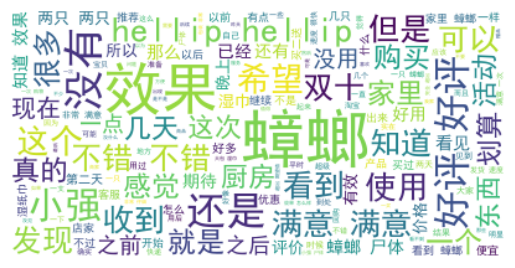

In [68]:
#pip install WordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# 配置词云的基本参数。
wordcloud = WordCloud(font_path='simhei.ttf', background_color='white').generate(words_str)

# 显示词云图
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [69]:
import jieba.analyse
jieba.analyse.extract_tags(words_str,topK=10,withWeight=True)

[('蟑螂', 0.3608850646029042),
 ('效果', 0.21856427284757446),
 ('好评', 0.12273106394135838),
 ('hellip', 0.11702060431015492),
 ('双十', 0.09076011652887941),
 ('不错', 0.08435797961913884),
 ('小强', 0.0819244585045574),
 ('满意', 0.05872588883111158),
 ('湿巾', 0.055997589792589474),
 ('追评', 0.045946740342637515)]